# Objective :- This is a usecase where we need to identify from the 17 input features  and 1 class output feature to be either a star, galaxy or quasar. 

In [1]:
#importing libraries for visiualizing and understanding dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
space_df=pd.read_csv('Space.csv')

In [3]:
space_df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [4]:
space_df.tail()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229
9999,1.237650e+18,131.665012,51.805307,19.27586,17.37829,16.30542,15.83548,15.50588,1345,301,3,163,5.033410e+17,GALAXY,0.118417,447,51877,233


# Attribute Information

objid = Object Identifier

ra = J2000 Right Ascension (r-band)
Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial equator from the Sun at the March 
equinox to the hour circle of the point above the earth.

dec = J2000 Declination (r-band)
declination (abbreviated dec), these astronomical coordinates specify the direction of a point on the celestial sphere 
(traditionally called in English the skies or the sky) in the equatorial coordinate system.

u, g, r, i, z represent the response of the 5 bands of the telescope.

run = Run Number, which identifies the specific scan,

rereun = Rerun Number, specifies how the image was processed

camcol = Camera column, a number from 1 to 6, identifying the scanline within the run

field = Field number, The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for 
particularly long runs.

specobjid = Object Identifier, 

class = object class (galaxy, star or quasar object), The class identifies an object to be either a galaxy, star or quasar. 
This will be the response variable which we will be trying to predict.

redshift = Final Redshift, In physics, redshift happens when light or other electromagnetic radiation from an object is 
increased in wavelength, or shifted to the red end of the spectrum.

plate = plate number,  Each plate has a unique serial number, which is called plate

mjd = Modified Julian Date, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.

fiberid = fiber ID, The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to 
the slithead. Each object is assigned a corresponding fiberID.


In [5]:
#finding the numbers of rows and columns
space_df.shape

(10000, 18)

In [6]:
#finding the information about the data
space_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


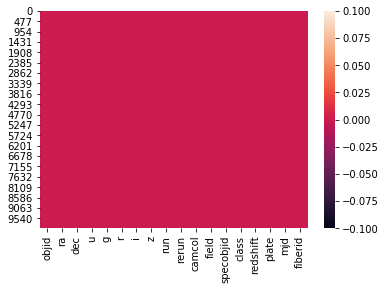

In [7]:
#Checking null values
sns.heatmap(space_df.isnull())

In [8]:
space_df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [9]:
#there dodnot exits any null value in the dataset

# Bivariate Analysis

Text(0.5, 1.0, 'Count of Star,Galaxy,Quasar')

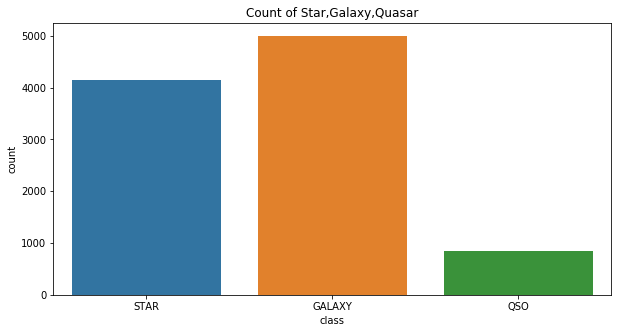

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(space_df['class'])
plt.title('Count of Star,Galaxy,Quasar')

Text(0.5, 1.0, 'specific Scan for Star,Galaxy,Quasar')

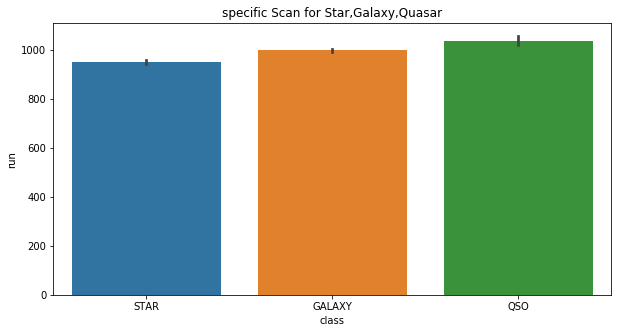

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(space_df['class'],space_df['run'])
plt.title('specific Scan for Star,Galaxy,Quasar')

Text(0.5, 1.0, 'scanline within the run')

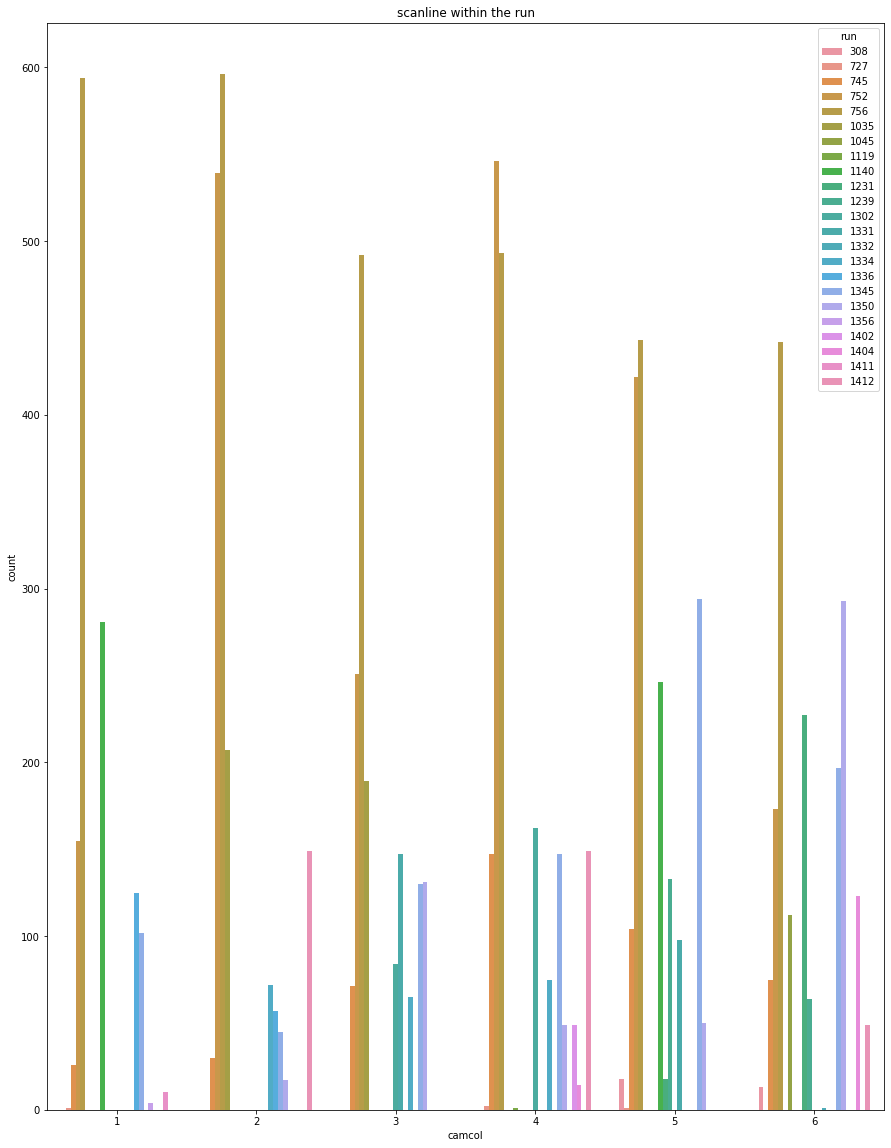

In [12]:
plt.figure(figsize=(15,20))
sns.countplot(space_df['camcol'],hue=space_df['run'])
plt.title('scanline within the run')

Text(0.5, 1.0, 'Red_shift W.R.T Star,Galaxy,Quasar')

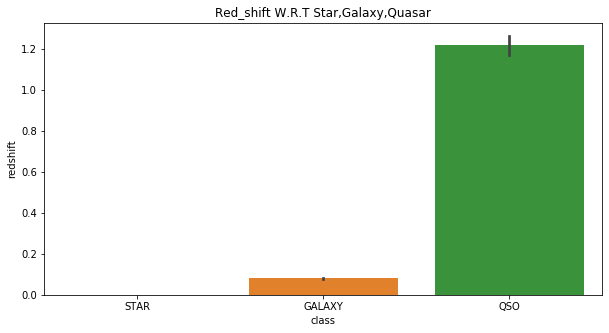

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(space_df['class'],space_df['redshift'])
plt.title('Red_shift W.R.T Star,Galaxy,Quasar')

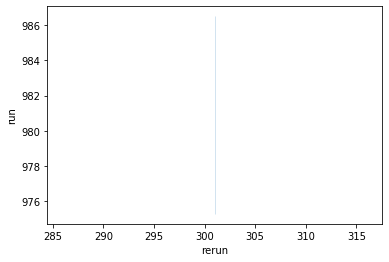

In [14]:
sns.lineplot(space_df['rerun'],space_df['run'])

Text(0.5, 1.0, 'Long run W.R.T Star,Galaxy,Quasar')

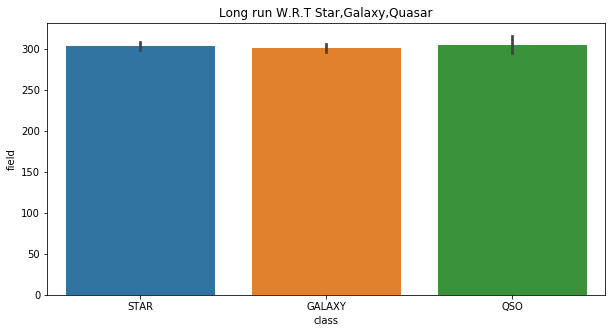

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(space_df['class'],space_df['field'])
plt.title('Long run W.R.T Star,Galaxy,Quasar')

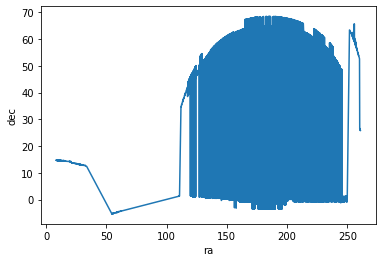

In [16]:
sns.lineplot(space_df['ra'],space_df['dec'])

In [17]:
#seprating  the class column towards one end
space_df['Class']=space_df['class']

In [18]:
space_df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid,Class
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491,STAR
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541,STAR
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513,GALAXY
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510,STAR
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512,STAR


In [19]:
space_df.drop(['class'],axis=1,inplace=True)

In [20]:
space_df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid,Class
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,-0.000009,3306,54922,491,STAR
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,-0.000055,323,51615,541,STAR
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0.123111,287,52023,513,GALAXY
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,-0.000111,3306,54922,510,STAR
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,0.000590,3306,54922,512,STAR


In [21]:
#using Label_Encoder to change categorical column 'Class' to numeric
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
space_df['Class']=lb.fit_transform(space_df['Class'])

In [22]:
space_df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid,Class
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,-0.000009,3306,54922,491,2
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,-0.000055,323,51615,541,2
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0.123111,287,52023,513,0
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,-0.000111,3306,54922,510,2
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,0.000590,3306,54922,512,2


# Univariate Analysis

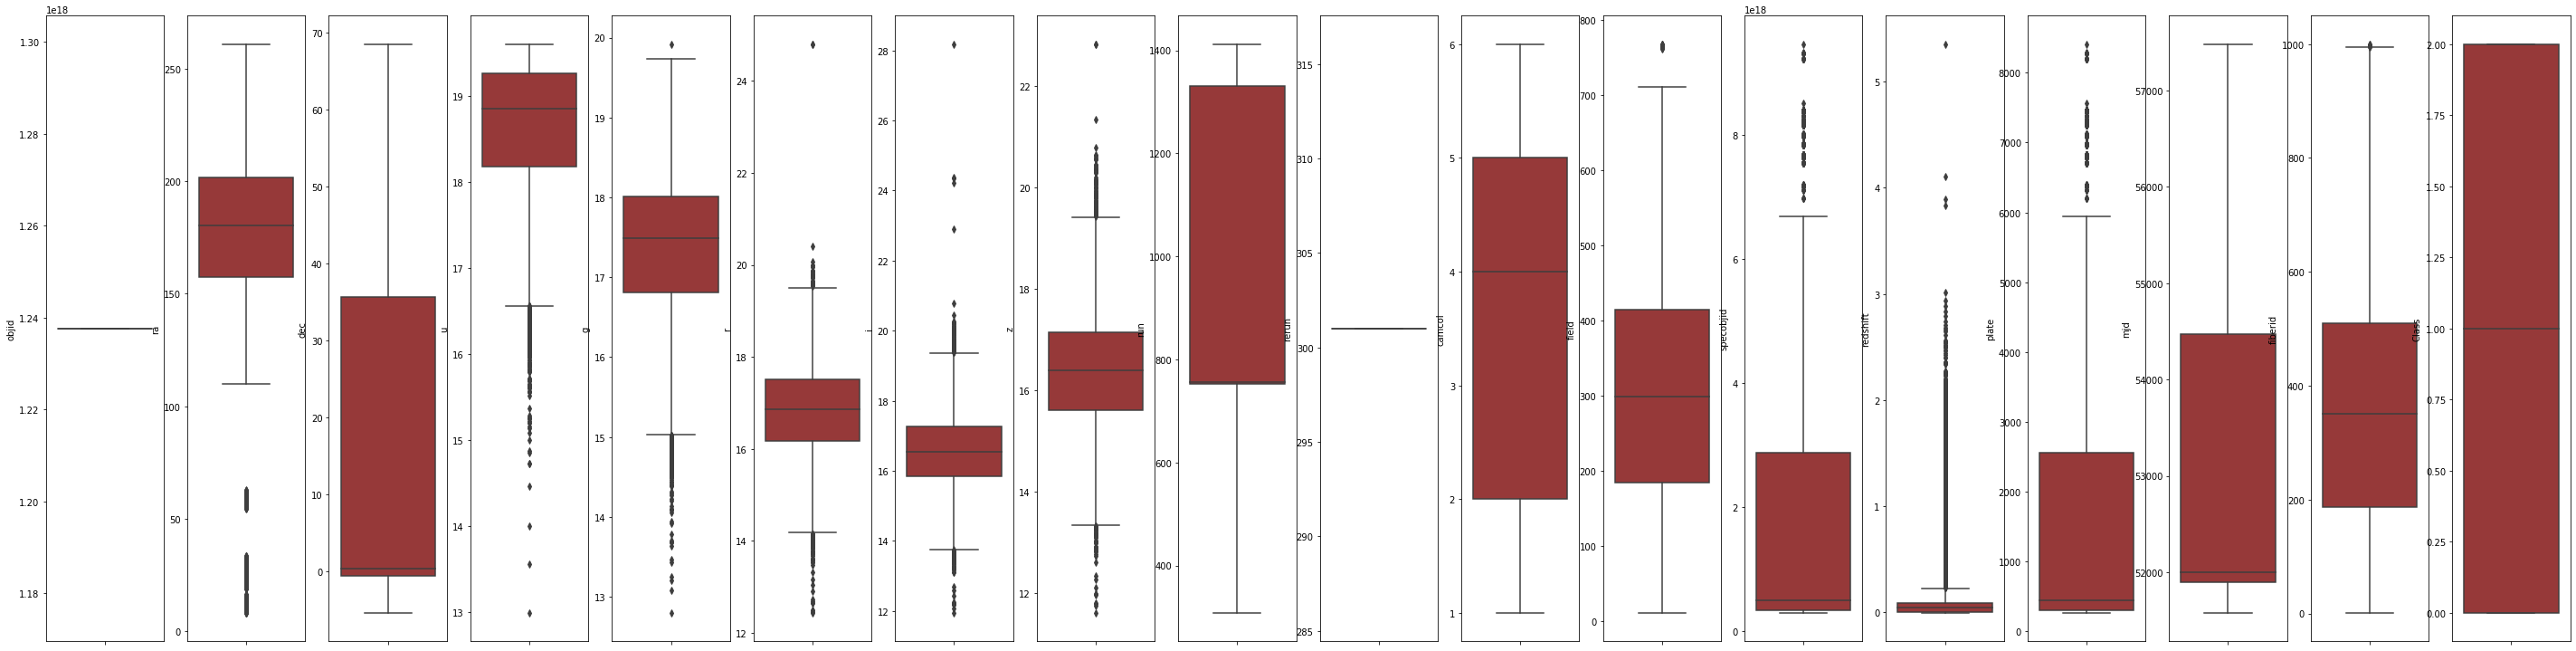

In [23]:
#using boxplot to see outliers and IQR range
collist=space_df.columns.values
ncol=18
nrows=10
plt.figure(figsize=(50,150))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(space_df[collist[i]],color='brown',orient='v')

In [24]:
#using distplot to check the distribution

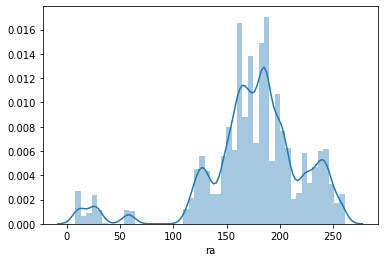

In [25]:
sns.distplot(space_df['ra'])

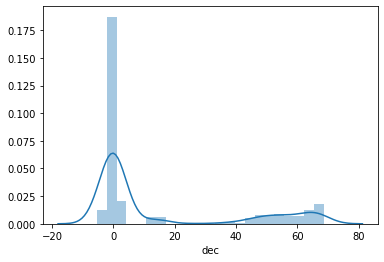

In [26]:
sns.distplot(space_df['dec'])

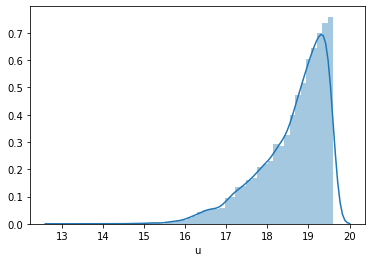

In [27]:
sns.distplot(space_df['u'])

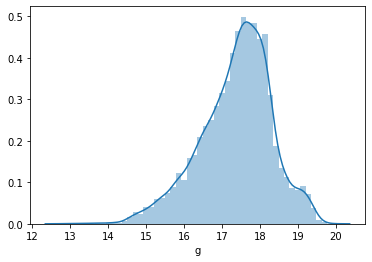

In [28]:
sns.distplot(space_df['g'])

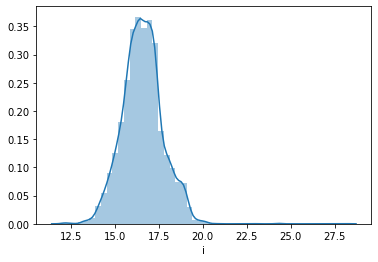

In [29]:
sns.distplot(space_df['i'])

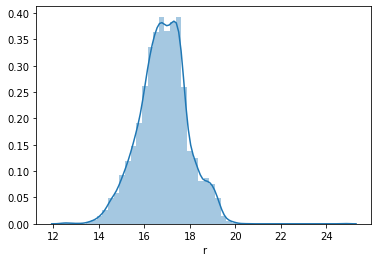

In [30]:
sns.distplot(space_df['r'])

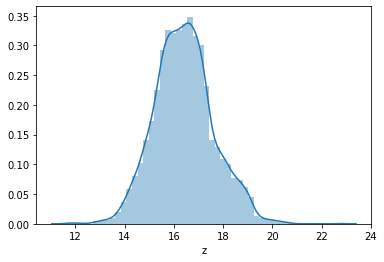

In [31]:
sns.distplot(space_df['z'])

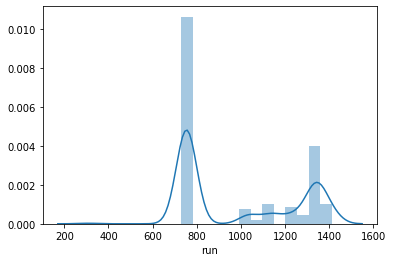

In [32]:
sns.distplot(space_df['run'])

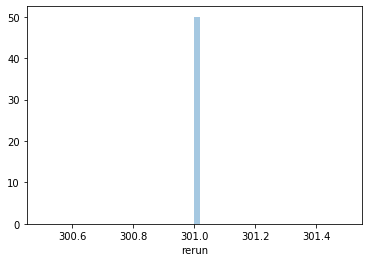

In [33]:
sns.distplot(space_df['rerun'])

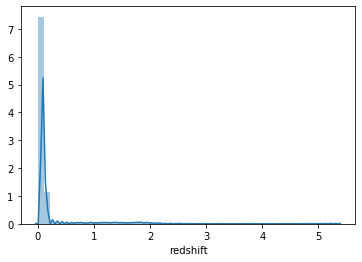

In [34]:
sns.distplot(space_df['redshift'])

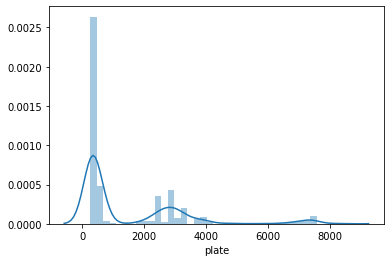

In [35]:
sns.distplot(space_df['plate'])

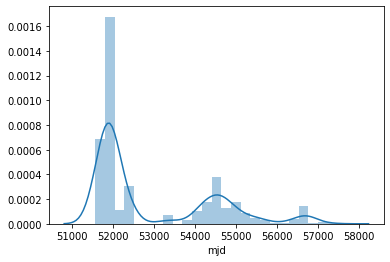

In [36]:
sns.distplot(space_df['mjd'])

# Statistical Analysis

In [37]:
space_df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid,Class
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400,0.915400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149,0.952856
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000,0.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000,0.000000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000,1.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000,2.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000,2.000000


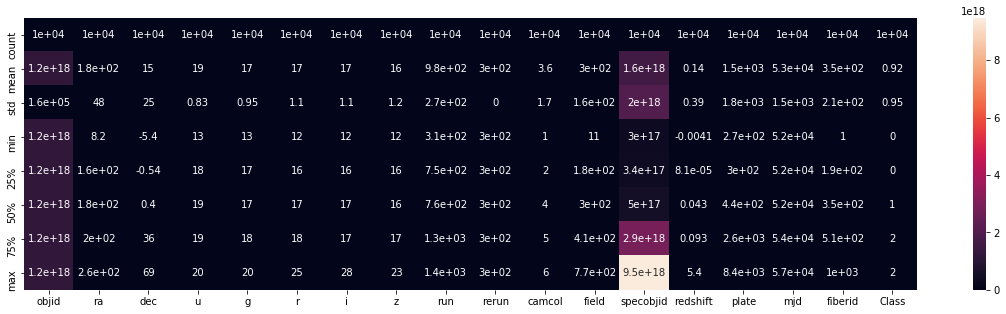

In [38]:
plt.figure(figsize=(20,5))
sns.heatmap(space_df.describe(),annot=True)

In [39]:
space_cor=space_df.corr()

In [40]:
space_cor

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid,Class
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-1.829075e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15,-3.355500e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,-9.532711e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02,-4.321896e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,8.834533e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01,-5.891815e-02
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,-1.294293e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02,-2.690437e-01
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-5.497908e-02,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02,-9.921163e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,1.978831e-02,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02,4.962769e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,7.295994e-02,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02,1.467908e-01
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,1.123981e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02,2.157584e-01
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,9.360436e-02,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01,-7.816172e-02
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


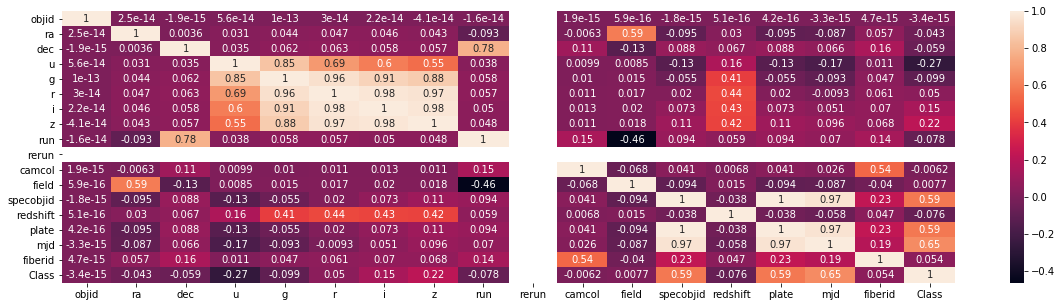

In [41]:
plt.figure(figsize=(20,5))
sns.heatmap(space_cor,annot=True)

In [42]:
#checking the skewness
space_df.skew()

objid        1.000150
ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
rerun        0.000000
camcol      -0.100220
field        0.249795
specobjid    1.794627
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
Class        0.169292
dtype: float64

In [43]:
#the dataset is positively skewed as well as negatively skewed

In [44]:
#dropping Objid, specobjid, fiberid as they do not contribute much toh the prediction

In [45]:
space_df.drop(['objid','specobjid','fiberid'],axis=1,inplace=True)

# Removing outliers and skewness from the dataset

In [46]:
from scipy.stats import zscore
z=np.abs(zscore(space_df))
print(z)

[[0.16745842 0.58492272 1.03148637 ... 1.03148936 1.30931064 1.13831973]
 [0.16886159 0.58311429 0.05243046 ... 0.63621258 0.87919741 1.13831973]
 [0.17057433 0.58347525 0.92156796 ... 0.65633905 0.60919097 0.96073933]
 ...
 [0.92039468 1.46090664 0.16753826 ... 3.26608697 2.69309363 1.13831973]
 [0.92197294 1.46432109 0.31801835 ... 0.56688806 0.70581092 0.96073933]
 [0.91804124 1.46639319 0.79229193 ... 0.56688806 0.70581092 0.96073933]]


In [47]:
threhold=3

In [48]:
print(np.where(z>3))#printing all the value position which are greater than the threshold value

(array([  45,  109,  129, ..., 9992, 9994, 9997], dtype=int64), array([11, 11, 11, ..., 12, 12, 12], dtype=int64))


In [49]:
z[45][11]#checking the above output result 

4.889000167917864

In [50]:
z[109][11] #checking the above output result 

5.0145395195393245

In [51]:
space_new=space_df[(z<3).all(axis=1)]  #removing outliers

In [52]:
print("Shape of the dataset before removing outliers",space_df.shape)
print("\n \n")
print("Shape of the dataset after removing the outliers",space_new.shape)

Shape of the dataset before removing outliers (10000, 15)

 

Shape of the dataset after removing the outliers (0, 15)


Sometimes, you cannot remove the outliers as one column affects the whole dataset, Therefore using the dataset with outliers

In [53]:
#when removing skewness second time using sqrt it is converting some data into nan and using np.log for remooving 
#skewness also turns some data into nan
#therefore skipping removing of skewness 

# Splitting the data into training and testing sets

In [54]:
x=space_df.iloc[:,:-1]

In [55]:
x.shape

(10000, 14)

In [56]:
x.head()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,redshift,plate,mjd
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,-0.000009,3306,54922
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,-0.000055,323,51615
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,0.123111,287,52023
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,-0.000111,3306,54922
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,0.000590,3306,54922


In [57]:
y=space_df.iloc[:,-1]

In [58]:
y.shape

(10000,)

In [59]:
y.head()

0    2
1    2
2    0
3    2
4    2
Name: Class, dtype: int32

In [60]:
#Scaling the data in x
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_x=sc.fit_transform(x)

In [61]:
x=df_x
print(x)

[[ 0.16745842 -0.58492272  1.03148637 ... -0.36973112  1.03148936
   1.30931064]
 [ 0.16886159 -0.58311429  0.05243046 ... -0.36984929 -0.63621258
  -0.87919741]
 [ 0.17057433 -0.58347525  0.92156796 ... -0.05302706 -0.65633905
  -0.60919097]
 ...
 [-0.92039468  1.46090664  0.16753826 ... -0.37074104  3.26608697
   2.69309363]
 [-0.92197294  1.46432109  0.31801835 ... -0.33364691 -0.56688806
  -0.70581092]
 [-0.91804124  1.46639319  0.79229193 ... -0.06510125 -0.56688806
  -0.70581092]]


In [62]:
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB  
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc


In [63]:
# finding best random state
max_score=0
final_rstate=0

for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    lg.score(x_train,y_train)
    pred=lg.predict(x_test)
    acc_score=accuracy_score(y_test,pred)
    print("Accuracy SCORE is equal to :",acc_score,"at random state",i)
    if acc_score > max_score:
        max_score=acc_score
        final_rstate=i   
print("The maximum Accuracy_score is ",max_score, "at random state",final_rstate)

Accuracy SCORE is equal to : 0.9724 at random state 42
Accuracy SCORE is equal to : 0.9768 at random state 43
Accuracy SCORE is equal to : 0.98 at random state 44
Accuracy SCORE is equal to : 0.9804 at random state 45
Accuracy SCORE is equal to : 0.978 at random state 46
Accuracy SCORE is equal to : 0.9728 at random state 47
Accuracy SCORE is equal to : 0.9752 at random state 48
Accuracy SCORE is equal to : 0.9812 at random state 49
Accuracy SCORE is equal to : 0.978 at random state 50
Accuracy SCORE is equal to : 0.9772 at random state 51
Accuracy SCORE is equal to : 0.9724 at random state 52
Accuracy SCORE is equal to : 0.9772 at random state 53
Accuracy SCORE is equal to : 0.978 at random state 54
Accuracy SCORE is equal to : 0.9732 at random state 55
Accuracy SCORE is equal to : 0.9728 at random state 56
Accuracy SCORE is equal to : 0.9812 at random state 57
Accuracy SCORE is equal to : 0.9744 at random state 58
Accuracy SCORE is equal to : 0.9788 at random state 59
Accuracy SCORE 

In [64]:
#finalizing the train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=49)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(7500, 14) (2500, 14) (7500,) (2500,)


# Testing the Algorithms and finding the the best parameters using Grid Search cv

In [65]:
#best parameter for Logistic Regression
from sklearn.model_selection import GridSearchCV
lrg=LogisticRegression()
parameters={'penalty':['l1','l2']}
gd=GridSearchCV(lrg,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'penalty': 'l2'}

In [66]:
from sklearn.model_selection import GridSearchCV
svc=SVC()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gd=GridSearchCV(svc,parameters)
gd.fit(x_train,y_train)
gd.best_params_


{'C': 10, 'kernel': 'linear'}

In [67]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
parameters={'n_neighbors':(1,10)}
gd=GridSearchCV(knn,parameters)
gd.fit(x_train,y_train)
gd.best_params_


{'n_neighbors': 1}

In [68]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dtc,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'entropy'}

In [69]:
Model= []
score= []
cvs=[]
rocscore=[]
model=[LogisticRegression(penalty='l2'),DecisionTreeClassifier(criterion='entropy'),SVC(C=10,kernel='linear'),KNeighborsClassifier(n_neighbors=1),GaussianNB()]
for models in model:
    print("\n")
    Model.append(models)
    models.fit(x_train,y_train)
    print(models)
    prediction=models.predict(x_test)
    print("\n")
    acc_score=accuracy_score(y_test,prediction)
    print("ACCURACY_SCORE =",acc_score)
    score.append(acc_score*100)
    print("\n")
    cv_score=cross_val_score(models,x,y,cv=10, scoring='accuracy').mean()
    print("CROSS_VAL_SCORE =",cv_score)
    cvs.append(cv_score*100)
    print("\n")



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


ACCURACY_SCORE = 0.9812


CROSS_VAL_SCORE = 0.9768000000000001




DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


ACCURACY_SCORE = 0.9908


CROSS_VAL_SCORE = 0.9856




SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=

In [70]:
outcome=pd.DataFrame({'Model':['LogisticRegression','DecisionTreeClassifier','SVC','KNeighborsClassifier','GaussianNB'],'Accuracy_Score':[0.9812,0.9916,0.9884,0.9152,0.972],'Cross_Val_Sore':[0.9768,0.9849,0.9890,0.9011,0.9698]})
outcome

,Model,Accuracy_Score,Cross_Val_Sore
0,LogisticRegression,0.9812,0.9768
1,DecisionTreeClassifier,0.9916,0.9849
2,SVC,0.9884,0.9890
3,KNeighborsClassifier,0.9152,0.9011
4,GaussianNB,0.9720,0.9698


In [72]:
#Hence it is observed that decision_tree_classifier  is giving a good result, therefore finalizing it

In [73]:
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)
prediction=dtc.predict(x_test)
acc_score=accuracy_score(y_test,prediction)
print("Accuracy Score =", acc_score)
cv_score=cross_val_score(dtc,x,y,cv=10,scoring='accuracy').mean()
print("The Cross Val Score =", cv_score)

Accuracy Score = 0.99
The Cross Val Score = 0.9855


In [74]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,criterion='entropy')
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)

1.0

In [75]:
predicn=rfc.predict(x_test)
acc_score=accuracy_score(y_test,predicn)
print("Accuracy Score =", acc_score)
cv_score=cross_val_score(rfc,x,y,cv=10,scoring='accuracy').mean()
print("The Cross Val Score =", cv_score)

Accuracy Score = 0.9888
The Cross Val Score = 0.9885999999999999


In [76]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(base_estimator=dtc, n_estimators=50)
ada.fit(x_train,y_train)
ada.score(x_train,y_train)

1.0

In [77]:
prediction=ada.predict(x_test)
acc_score=accuracy_score(y_test,prediction)
print("Accuracy Score =", acc_score)
cv_score=cross_val_score(ada,x,y,cv=10,scoring='accuracy').mean()
print("The Cross Val Score =", cv_score)

Accuracy Score = 0.9904
The Cross Val Score = 0.9853


not much difference when using Rando_Forest_Classifier or AdaBoost_classifier,therefore saving as Decision_Tree_Classifier 

In [78]:
#Saving the File
from sklearn.externals import joblib
joblib.dump(dtc,"dtc_Space_server.pkl")

['dtc_Space_server.pkl']